# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](https://github.com/justmarkham/DAT8/blob/master/data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Step 1: Read the data into Pandas

In [2]:
# create a DataFrame called 'titanic'
# hint: with pd.read_csv, use index_col="PassengerId"
# investigate the features, titanic.head()

titanic = pd.read_csv('../../DAT-DC-10/data/titanic.csv', index_col="PassengerId")
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Step 2: Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [3]:
feature_cols = ['Pclass', 'Parch']
# Create X and Y
X = titanic[feature_cols]
y = titanic.Survived

## Step 3: Split the data into training and testing sets

In [4]:
# train-test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [5]:
# create a LogisticRegression model; fit(); investigate the coeffs
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [6]:
zip(feature_cols, logreg.coef_[0])

[('Pclass', -0.86214546267919001), ('Parch', 0.24445817509416012)]

## Step 5: Make predictions on the testing set and calculate the accuracy

In [7]:
# class predictions (not predicted probabilities)
y_pred = logreg.predict(X_test)

In [8]:
# calculate classification accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.69955156950672648

## Step 6: Compare your testing accuracy to the null accuracy

In [9]:
# null accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.61435
Name: Survived, dtype: float64

# Confusion matrix of Titanic predictions

In [10]:
# print confusion matrix
print metrics.confusion_matrix(y_test, y_pred)

[[115  22]
 [ 45  41]]


In [11]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [12]:
print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

True Positives: 41
True Negatives: 115
False Positives: 22
False Negatives: 45


In [13]:
# calculate the sensitivity
print TP / float(TP + FN)
print 44 / float(44 + 51)

0.476744186047
0.463157894737


In [14]:
# calculate the specificity
print TN / float(TN + FP)
print 105 / float(105 + 23)

0.839416058394
0.8203125


In [15]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

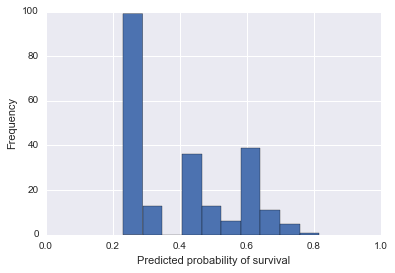

In [16]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [28]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [29]:
# old confusion matrix
print confusion

[[118  20]
 [ 50  35]]


In [30]:
# new confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[81 57]
 [32 53]]


In [31]:
# new sensitivity (higher than before)
print 63 / float(63 + 32)

0.663157894737


In [32]:
# new specificity (lower than before)
print 72 / float(72 + 56)

0.5625
